In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.13.0'

In [4]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
## import dataset
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
## Ferature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [12]:
## now drop categorical column
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
## now add transformed columns into dataframe
X=pd.concat([X,geography,gender],axis=1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [19]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [20]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential #all neuron interconnected sequentially so that it perform forward, backward propagation
from tensorflow.keras.layers import Dense   #for creating layers like input and hidden layers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU #activation functions
from tensorflow.keras.layers import Dropout

In [21]:
# Lets initialize the ANN
classifier=Sequential()

In [22]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [23]:
# adding the second hidden layer
classifier.add(Dense(units=7,activation='relu'))
#classifier.add(Dropout(0.2))

In [24]:
##adding the third hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [25]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [26]:
classifier.build()

In [27]:
classifier.summary()  #total number of weights and params are 288

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 10)                80        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 288 (1.12 KB)
Trainable params: 288 (1.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# apply optimization technique (providing parameters called compile)
classifier.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [29]:
## Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)

In [30]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 9s 4ms/step - loss: 0.5067 - accuracy: 0.7843 - val_loss: 0.4227 - val_accuracy: 0.8135
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4108 - accuracy: 0.8275 - val_loss: 0.3705 - val_accuracy: 0.8430
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3688 - accuracy: 0.8494 - val_loss: 0.3583 - val_accuracy: 0.8535
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3560 - accuracy: 0.8530 - val_loss: 0.3543 - val_accuracy: 0.8545
Epoch 5/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3495 - accuracy: 0.8576 - val_loss: 0.3536 - val_accuracy: 0.8550
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3470 - accuracy: 0.8569 - val_loss: 0.3511 - val_accuracy: 0.8560
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3448 - accuracy: 0.8576 - val_loss: 0.3466 - val_accuracy: 0.8600

In [31]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

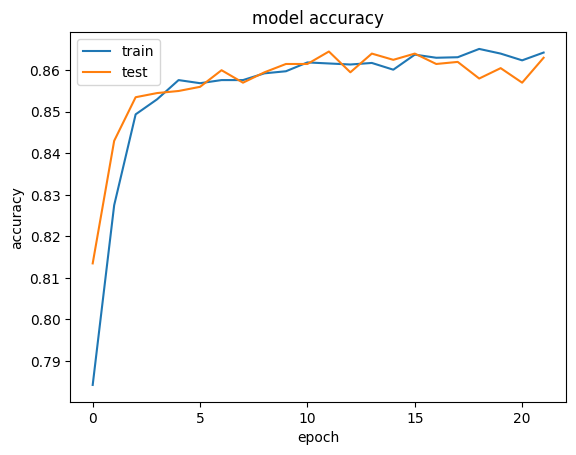

In [32]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

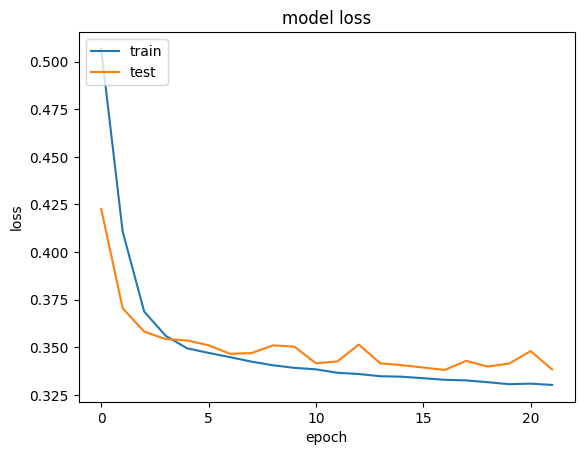

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.05590697],
       [0.01804943],
       [0.10369398],
       ...,
       [0.6959346 ],
       [0.07184546],
       [0.25721064]], dtype=float32)

In [35]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [36]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1548,   59],
       [ 215,  178]])

In [37]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.863

In [38]:
## Saving h5 file
classifier.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [40]:
#after loading prediction
classifier1.predict(X_test)

63/63 [==============================] - 0s 3ms/step


array([[0.05590697],
       [0.01804943],
       [0.10369398],
       ...,
       [0.6959346 ],
       [0.07184546],
       [0.25721064]], dtype=float32)